# Feature
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2024-03-02

## Table of Contents
* Second Derivative of Gaussiance
* Blob Filter (1D)
* Blob Filter (2D)
* Comparison of DoG and LoG
* Laplacian of Gaussian (Filter Size)
* Separable Filter
* Difference of Gaussian
* Orientation Normalization
* Orientation Normalization2
* Intensity Invariant

## Second Derivative of Gaussiance

$ g(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) $  


$ g''(x) = -\frac{1}{\sigma \sqrt{2\pi}} \left(\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2}\right) \exp\left(-\frac{x^2}{2\sigma^2}\right) $  


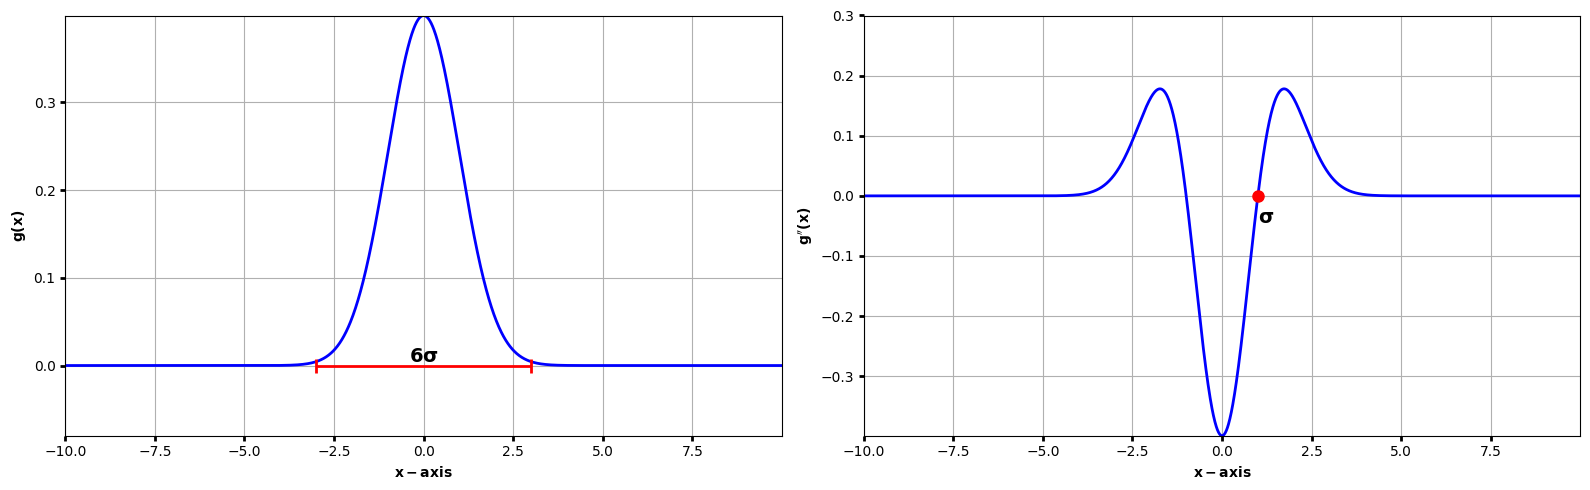

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define variables
x = np.arange(-10, 10, 0.01)
sigma = 1
g = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((x)/sigma)**2)

# Second derivative
gpp = -1/(sigma*np.sqrt(2*np.pi))*(x**2/sigma**4-1/sigma**2)*np.exp(-1/2*((x)/sigma)**2)

# Adjusting the figure size and layout
plt.figure(figsize=(16, 5))

# Plotting g(x)
plt.subplot(1, 2, 1)
plt.plot(x, g, 'b', linewidth=2)
plt.errorbar(0, 0, xerr=3*sigma, fmt='r', lw=2, capsize=5, capthick=2, errorevery=1)
plt.text(0, 0, r'$\bf{6\sigma}$', fontsize=14, horizontalalignment='center', verticalalignment='bottom')
plt.grid(True)
plt.xlabel(r'$\bf{x-axis}$')
plt.ylabel(r'$\bf{g(x)}$')
plt.ylim([-0.08, max(g)])
plt.gca().tick_params(axis='both', which='major', labelsize=10, width=2)
plt.autoscale(enable=True, axis='x', tight=True)

# Corrected second derivative
gpp = -1/(sigma*np.sqrt(2*np.pi)*sigma**3)*(1-x**2/sigma**2)*np.exp(-1/2*((x)/sigma)**2)

# Plotting g''(x)
plt.subplot(1, 2, 2)
plt.plot(x, gpp, 'b', linewidth=2)
plt.plot(sigma, 0, 'or', markersize=8)
plt.text(sigma, -0.02, r'$\bf{\sigma}$', fontsize=14, horizontalalignment='left', verticalalignment='top')
plt.grid(True)
plt.xlabel(r'$\bf{x-axis}$')
plt.ylabel(r"$\bf{g''(x)}$")
plt.ylim([min(gpp), 0.3])
plt.gca().tick_params(axis='both', which='major', labelsize=10, width=2)
plt.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

## Blob Filter (1D)

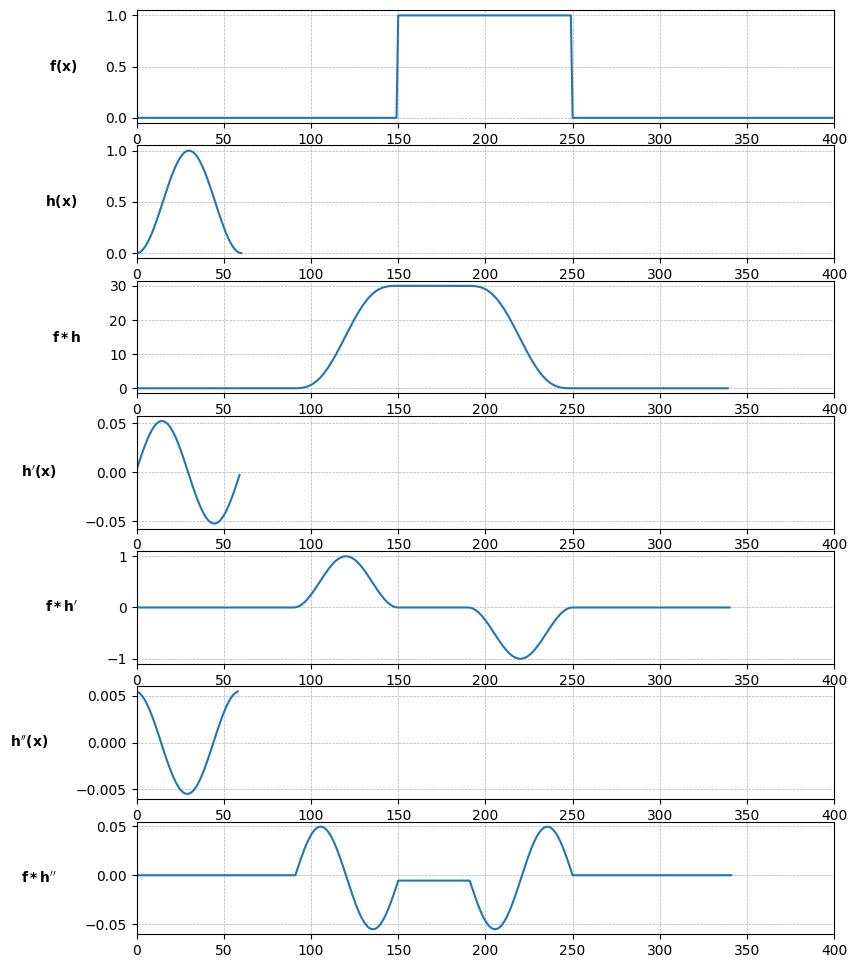

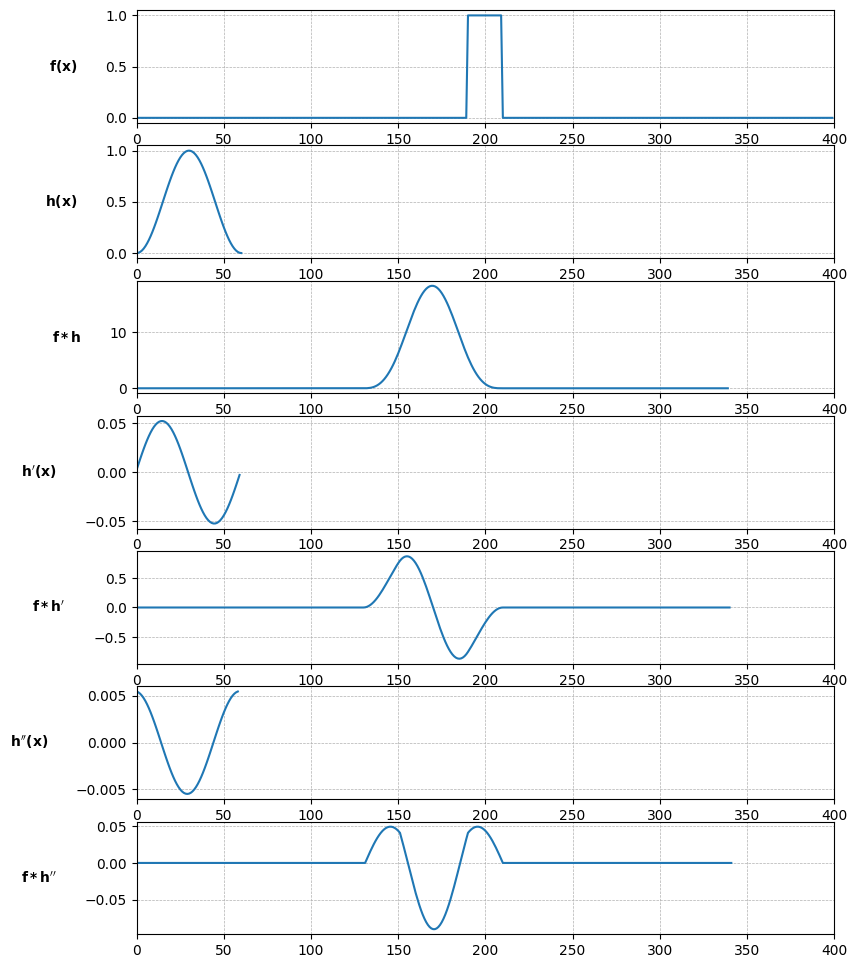

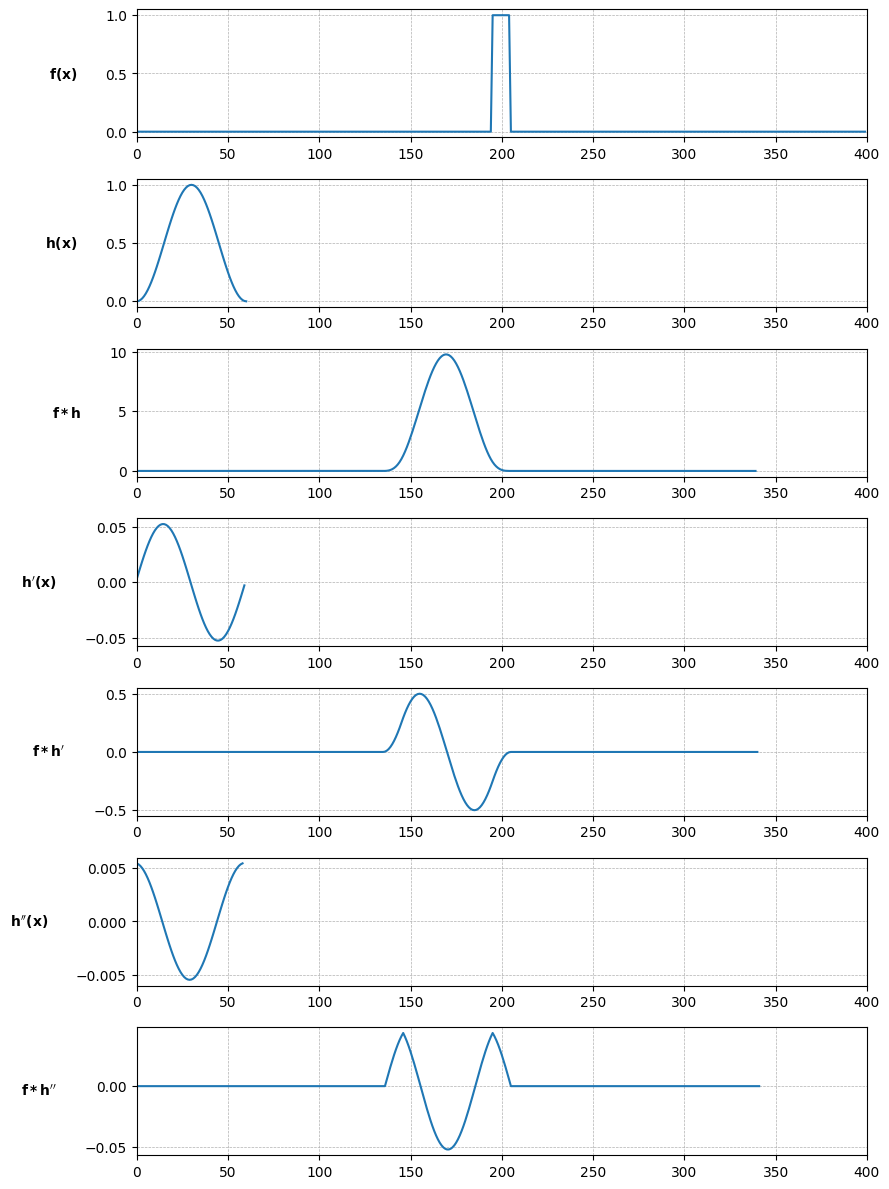

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1D example with three different signal lengths
fig2, axs2 = plt.subplots(7, 1, figsize=(9, 12))
fig3, axs3 = plt.subplots(7, 1, figsize=(9, 12))
fig4, axs4 = plt.subplots(7, 1, figsize=(9, 12))

signals = {
    'fig2': np.zeros(400),
    'fig3': np.zeros(400),
    'fig4': np.zeros(400),
}

signals['fig2'][150:250] = 1
signals['fig3'][190:210] = 1
signals['fig4'][195:205] = 1

windSize = 61
h = np.hanning(windSize)

for fig_key, sig in signals.items():
    axs = eval(f"axs{fig_key[-1]}")
    # Original signal
    axs[0].plot(sig, linewidth=1.5)
    axs[0].set_ylabel(r'$\bf f(x)$', rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[0].autoscale(enable=True, axis='x', tight=True)

    # Gaussian window
    h = np.hanning(windSize)
    axs[1].plot(h, linewidth=1.5)
    axs[1].set_ylabel(r'$\bf h(x)$', rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[1].autoscale(enable=True, axis='x', tight=True)

    # Convolution of signal and window
    fh = np.convolve(sig, h, 'valid')
    axs[2].plot(fh, linewidth=1.5)
    axs[2].set_ylabel(r'$\bf f * h$', rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[2].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[2].autoscale(enable=True, axis='x', tight=True)

    # First derivative of the window
    diff_h = np.diff(h)
    axs[3].plot(diff_h, linewidth=1.5)
    axs[3].set_ylabel(r"$\bf h'(x)$", rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[3].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[3].autoscale(enable=True, axis='x', tight=True)

    # Convolution of signal and first derivative of window
    fh = np.convolve(sig, diff_h, 'valid')
    axs[4].plot(fh, linewidth=1.5)
    axs[4].set_ylabel(r"$\bf f * h'$", rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[4].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[4].autoscale(enable=True, axis='x', tight=True)

    # Second derivative of the window
    diff_h2 = np.diff(diff_h)
    axs[5].plot(diff_h2, linewidth=1.5)
    axs[5].set_ylabel(r"$\bf h''(x)$", rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[5].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[5].autoscale(enable=True, axis='x', tight=True)

    # Convolution of signal and second derivative of window
    fh2 = np.convolve(sig, diff_h2, 'valid')
    axs[6].plot(fh2, linewidth=1.5)
    axs[6].set_ylabel(r"$\bf f * h''$", rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[6].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[6].autoscale(enable=True, axis='x', tight=True)

for ax in axs2:
    ax.set_xlim(0, len(signals['fig2']))
for ax in axs3:
    ax.set_xlim(0, len(signals['fig3']))
for ax in axs4:
    ax.set_xlim(0, len(signals['fig4']))

plt.tight_layout()
plt.show()


## Blob Filter (2D)

## Comparison of DoG and LoG

## Laplacian of Gaussian (Filter Size)

## Separable Filter

## Difference of Gaussian

## Orientation Normalization

## Orientation Normalization2

## Intensity Invariant